## Latent Semantic Indexing Assignment (Extra credit)


When we apply SVD reduction to textual data it is called **Latent Semantic Indexing**.

This notebook asks you to work through an example in the domain of document retrieval.

Document set

$$
\begin {array}{ll}
d_0 &  \text{Romeo and Juliet.}\\
d_1 & \text{Juliet: O happy dagger!}\\
d_2 &  \text{Romeo died by dagger.}\\
d_3 & \text{"Live free or die", that’s  New-Hampshire’s motto.}\\
d_4 &  \text{Did you know, New-Hampshire is in New-England?}
\end{array}
$$


Query:  dies dagger

Goal.  Compute the following **relevance ranking** for the query:  d2, d1, d3, d0, d4

The key point:  d0 ranks higher than d4, even though both fail to have any query words.  Why?
Because d1 contains words that have **co-occurred** (occurred in the same document) with
either or both query words.

The **term document** matrtix for the above data is:

$$
\begin {array}{lccccc}
& d_0 & d_1 & d_2 & d_3& d_4\\
\hline
\text{romeo} & 1&  0&  1&  0&  0\\
\text{juliet} & 1&  1&  0&  0&  0\\
\text{happy}  & 0&  1&  0&  0&  0\\
\text{dagger} & 0&  1&  1&  0&  0\\
\text{live} & 0&  0&  0&  1&  0\\
\text{die} & 0&  0&  1&  1&  0\\
\text{free} & 0&  0&  0&  1&  0\\
\text{new-hampshire} & 0&  0&  0&  1&  1
\end{array}
$$

In [ ]:
docs = ("Romeo and Juliet.",
        "Juliet: O happy dagger!",
        "Romeo died by dagger.",
        "' Live free or die ', that's New-Hampshire's motto.",
        "Did you know, New-Hampshire is in New-England?")

In [ ]:
import numpy as np

#toy term document matrix
TD = np.array([
    [1,0,1,0,0],
    [1,1,0,0,0],
    [0,1,0,0,0],
    [0,1,1,0,0],
    [0,0,0,1,0],
    [0,0,1,1,0],
    [0,0,0,1,0],
    [0,0,0,1,1],
])

#toy vocabulary (for the doc set above)
V = "romeo julie happy dagger live die free new-hampshire".split()

1.  Preprocess this data correctly so as to arrive at approximately the **target Term Document Matrix** and vocabulary (above),
    using scikit learn text preprocessing tools (`Vectorizer`).
2.  Reduce to 2 dimensions using SVD.
3.  Transform the query into the reduced space.
4.  Measure document relevance to the query using cosine.
5.  Produce the target relevance ranking for the document set.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import TreebankWordTokenizer#RegexpTokenizer#StringTokenizer
stemmer = nltk.PorterStemmer()
#stemmer = nltk.LancasterStemmer()
tb_tknzr = TreebankWordTokenizer()

# Slip a stemmer into the tokenizer

def my_tokenizer (doc,stemmer=stemmer,tokenizer=tb_tknzr):
    return [stemmer.stem(wd) for wd in tokenizer.tokenize(doc)]

puncts = list(":,.?!\'")
stop_words= "and by did in is or know you that \'s o".split()
cv = CountVectorizer(stop_words=stop_words+puncts,tokenizer=my_tokenizer,min_df=2,token_pattern=None)
# we call it dtm because the rows are docs, and the columns are terms (words)
dtm = cv.fit_transform(docs)

#to get vocab list
#cv.get_feature_names_out()

#cv.inverse_transform(dtm)

In [ ]:
# Porter
stmr = nltk.PorterStemmer()
my_tokenizer("u s forces hope that the world dominates by domination aggravation and fidelity",
            stemmer=stmr)

['u',
 's',
 'forc',
 'hope',
 'that',
 'the',
 'world',
 'domin',
 'by',
 'domin',
 'aggrav',
 'and',
 'fidel']

In [ ]:
# Lancaster
stmr = nltk.LancasterStemmer()
my_tokenizer("u s forces hope that the world dominates by domination aggravation and fidelity",
            stemmer=stmr)

['u',
 's',
 'forc',
 'hop',
 'that',
 'the',
 'world',
 'domin',
 'by',
 'domin',
 'aggrav',
 'and',
 'fidel']

In [ ]:
cv.get_feature_names_out()

array(['dagger', 'die', 'juliet', 'new-hampshir', 'romeo'], dtype=object)

#### Reducing

In [ ]:
reducer = TruncatedSVD(n_components=2)
dtm2 = reducer.fit_transform(dtm)

In [ ]:
dtm2

array([[ 0.94377067, -0.62279212],
       [ 0.94377067, -0.62279212],
       [ 1.54890367,  0.17205123],
       [ 0.6544984 ,  1.19805373],
       [ 0.17974866,  0.69503072]])

In [ ]:
reducer.components_

array([[ 0.53707696,  0.47474974,  0.40669371,  0.17974866,  0.53707696],
       [-0.16548589,  0.50302301, -0.45730623,  0.69503072, -0.16548589]])

In [ ]:
q0 = cv.transform(np.array(["died dagger"]))
q1 = reducer.transform(q0)

In [ ]:
dtm2

array([[ 0.94377067, -0.62279212],
       [ 0.94377067, -0.62279212],
       [ 1.54890367,  0.17205123],
       [ 0.6544984 ,  1.19805373],
       [ 0.17974866,  0.69503072]])

We wanted d2, d1, d3, d0, d4  (most to least)

We got:

In [ ]:
sims = cosine_similarity(q1,dtm2)
sims.argsort()[0,:][::-1] #least to most: key 0 > 4

array([2, 3, 0, 1, 4])

In [ ]:
docs

('Romeo and Juliet.',
 'Juliet: O happy dagger!',
 'Romeo died by dagger.',
 "' Live free or die ', that's New-Hampshire's motto.",
 'Did you know, New-Hampshire is in New-England?')

In [ ]:
dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (5, 5)>

In [ ]:
tdm.shape,red2.shape

((5, 5), (5, 2))

In [ ]:
from numpy.linalg import eig
tdm = (dtm.toarray()).T
GM = tdm.T@tdm
# cols of evecs are the evecs
evals,evecs = eig(GM)
# confirms the last two are the biggest
idxs = evals.argsort()
(e0,e1) = evecs[:,-1],evecs[:,-2]
red2 = evecs[:,-2:]
(lambda0,lambda1) = evals[-1],evals[-2]
#transform docs to 2D
tdm2 = dtm@red2
tdm2

array([[ 1.58126112e-16, -1.03209670e+00],
       [ 7.07106781e-01, -1.80924163e-01],
       [ 1.99840144e-15, -5.45507975e-01],
       [-7.07106781e-01,  6.83117689e-01],
       [ 5.81549986e-17,  5.81229502e-01]])

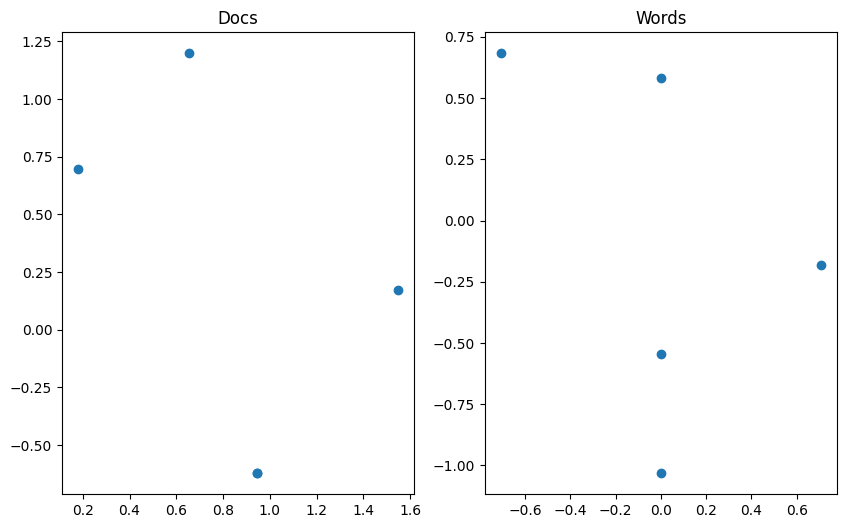

In [ ]:
from matplotlib import pyplot as plt

(fig,(ax0,ax1)) = plt.subplots(1,2, figsize= (10,6))

ax0.set_title("Docs")
ax0.scatter(dtm2[:,0],dtm2[:,1])
ax1.set_title("Words")
ax1.scatter(tdm2[:,0],tdm2[:,1])

## State of the Union Task

1. Do a TruncatedSVD reduction of the State of the Union data set, which consists of all the state of the union addresses of U.S. presidents since the practice began (1945?  Harry S. Truman).  Construct a reducer designed to reduce the term document matrix to to 200 dimensions.  What number of dimensions does the model actually reduce to for our data?  Why?
2. Find the document ranking for the two-word query "evil empire".
3. Compute NQ, the set of documents that contain neither of the two query words.  Find the highest ranking document within NQ.
4. Compare the highest ranking document in NQ with the next highest ranking document not in NQ.  Does their ranking reflect their relevance?
5. What is the minimum value that the scikit learn implementation of cosine can take?  What is the minimum value of the cosine simlarity scores in our data?  If they differ by more than 1e-8, is that a property of our data or the SVD computation or the scikit learn implementation of cosine?  Why?  If you have no idea why, make an educated guess and explain what lies behind your guess.
6. Find the two most similar documents (speeches), using cosine as you similarity measure, and using the reduced representation of the docments.

In [ ]:
from nltk.corpus import state_union
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import nltk
nltk.download('state_union')

from nltk.corpus import state_union
from sklearn.feature_extraction.text import TfidfVectorizer

fid0 =state_union.fileids()[0]
docs = []
for fid in state_union.fileids():
    with state_union.open(fid) as fh:
        docs.append(fh.read())

[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.


In [ ]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import TreebankWordTokenizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

nltk.download('stopwords')

def my_tokenizer (doc,stemmer=stemmer,tknzr=tb_tknzr):
    return [stemmer.stem(wd) for wd in tknzr.tokenize(doc)]

stemmer = nltk.PorterStemmer()
stops = [stemmer.stem(st) for st in stopwords.words("english")]
tb_tknzr = TreebankWordTokenizer()
puncts = list(":,.?!\'")
cv = TfidfVectorizer(stop_words=stops+puncts,tokenizer=my_tokenizer,min_df=2,token_pattern=None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dtm = cv.fit_transform(docs)

#1
reducer = TruncatedSVD(n_components=200)
dtm_reduced = reducer.fit_transform(dtm)
actual_dimensions = dtm_reduced.shape[1]
print(f"The actual number of dimensions after reduction is: {actual_dimensions}")
print("This is because the number of unique features (terms) in the data is less than the requested 200 dimensions.")

#2
query = "evil empire"
query_vector = cv.transform([query])
query_vector_reduced = reducer.transform(query_vector)
similarities = cosine_similarity(query_vector_reduced, dtm_reduced)
ranking_indices = similarities.argsort()[0][::-1]

print("\nDocument ranking for two-word query 'evil empire':")
for rank, index in enumerate(ranking_indices):
    print(f"Rank {rank + 1}: {state_union.fileids()[index]}")
query_words = query.split()
nq_indices = []
for i, doc in enumerate(docs):
    contains_query_word = False
    for word in query_words:
        if word.lower() in doc.lower():
            contains_query_word = True
            break
    if not contains_query_word:
        nq_indices.append(i)

#3
highest_ranking_nq_index = -1
highest_ranking_nq_similarity = -1
for rank_index in ranking_indices:
    if rank_index in nq_indices:
        highest_ranking_nq_index = rank_index
        highest_ranking_nq_similarity = similarities[0, rank_index]
        break
if highest_ranking_nq_index != -1:
    print(f"\nHighest ranking docuzment in NQ ('documents that contain neither of the two query words'): {state_union.fileids()[highest_ranking_nq_index]}")
    print(f"Its similarity score is: {highest_ranking_nq_similarity}")
else:
    print("\nNo documents in NQ (all documents contain at least one query word).")

#4
highest_ranking_not_nq_index = -1
highest_ranking_not_nq_similarity = -1
for rank_index in ranking_indices:
    if rank_index not in nq_indices:
        highest_ranking_not_nq_index = rank_index
        highest_ranking_not_nq_similarity = similarities[0, rank_index]
        break

print("\nComparing relevance:")
if highest_ranking_nq_index != -1 and highest_ranking_not_nq_index != -1:
    print(f"Highest ranking document in NQ: {state_union.fileids()[highest_ranking_nq_index]} (Similarity: {highest_ranking_nq_similarity})")
    print(f"Highest ranking document not in NQ: {state_union.fileids()[highest_ranking_not_nq_index]} (Similarity: {highest_ranking_not_nq_similarity})")
else:
    print("Cannot perform comparison as either NQ or the set of documents not in NQ is empty.")

#5
min_sklearn_cosine = -1.0
print(f"\nMinimum theoretical value of scikit-learn cosine similarity: {min_sklearn_cosine}")
min_data_cosine = np.min(sims)
print(f"Minimum cosine similarity in our data: {min_data_cosine}")
tolerance = 1e-8
if abs(min_data_cosine - min_sklearn_cosine) > tolerance:
    print(f"The minimum values differ by more than {tolerance}.")
    print("This difference is likely a property of our data and the SVD computation, not the scikit-learn implementation of cosine.")
else:
    print(f"The minimum values do not differ significantly (within a tolerance of {tolerance}).")

#6
pairwise_similarities = cosine_similarity(dtm_reduced)
np.fill_diagonal(pairwise_similarities, -1)
most_similar_indices = np.unravel_index(np.argmax(pairwise_similarities), pairwise_similarities.shape)

doc1_index = most_similar_indices[0]
doc2_index = most_similar_indices[1]
similarity_score = pairwise_similarities[doc1_index, doc2_index]

print(f"\nThe two most similar documents are:")
print(f"Document 1: {state_union.fileids()[doc1_index]}")
print(f"Document 2: {state_union.fileids()[doc2_index]}")
print(f"Cosine Similarity: {similarity_score}")

The actual number of dimensions after reduction is: 65
This is because the number of unique features (terms) in the data is less than the requested 200 dimensions.

Document ranking for two-word query 'evil empire':
Rank 1: 1965-Johnson-2.txt
Rank 2: 1963-Johnson.txt
Rank 3: 1949-Truman.txt
Rank 4: 1963-Kennedy.txt
Rank 5: 2003-GWBush.txt
Rank 6: 1979-Carter.txt
Rank 7: 1973-Nixon.txt
Rank 8: 1980-Carter.txt
Rank 9: 1965-Johnson-1.txt
Rank 10: 1950-Truman.txt
Rank 11: 2002-GWBush.txt
Rank 12: 2001-GWBush-2.txt
Rank 13: 1982-Reagan.txt
Rank 14: 1967-Johnson.txt
Rank 15: 2005-GWBush.txt
Rank 16: 1991-Bush-2.txt
Rank 17: 1972-Nixon.txt
Rank 18: 1951-Truman.txt
Rank 19: 1991-Bush-1.txt
Rank 20: 1948-Truman.txt
Rank 21: 1976-Ford.txt
Rank 22: 1994-Clinton.txt
Rank 23: 1995-Clinton.txt
Rank 24: 2006-GWBush.txt
Rank 25: 2004-GWBush.txt
Rank 26: 1946-Truman.txt
Rank 27: 1958-Eisenhower.txt
Rank 28: 1945-Truman.txt
Rank 29: 1970-Nixon.txt
Rank 30: 1956-Eisenhower.txt
Rank 31: 1955-Eisenhower.tx